# Linear Regression

So far we have seen what Machine Learning is and why we use machine learning

We also have seen the difference between supervised and unsupervised learning

While talking about supervised learning we have defined regression to be a part of it

#### So get ready to finally learn your first Machine Learning Algorithm - Linear Regression!!

Let's first start by importing some relevant libraries

In [0]:
import pandas as pd                   # This is the library which is used for operations which have to be done on any data
import numpy as np                    # This is the library we will be using for linear algebra
import matplotlib.pyplot as plt       # This is the library we use for plotting graphs and make visualisations
%matplotlib inline
from IPython.display import Image

Now that we have finished importing libraries let's read our data into a DataFrame

In [0]:
data = pd.read_csv("data.csv")        # Reads a CSV file into a DataFrame

In [9]:
data.head(5)                           # Gives us the first 5 elements of the DataFrame

,feature,target
0,0.848383,34.465973
1,-0.294726,2.751125
2,1.001241,5.097244
3,0.186086,23.181563
4,-0.851089,20.401837


So we have finished the first step of this whole process

Our data is ready

Let's explore this data a little more

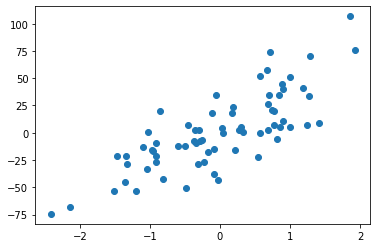

In [10]:
x = data['feature'].values
y = data['target'].values

#Lets Visualise the dataset
plt.scatter(x,y)                        # the scatter function makes a scatter plot of the data that is passed to it
plt.show()

We can see that the Feature is Linearly increasing with the Target

So it is safe to assume that the trend followed here is of the form y = ax + b where y is the Target, x is the Feature and a and b are parameters(slope and intercept)

The model needs to finally learn what will be the best choice for a and b so that we can represent the points accurately

Get ready to dive into the algorithm!!

Take as much time as you need to understand this, you can contact any group admin for doubts or post your doubts in the link on the github repository for doubt clarification

In [0]:
'''Usually the data is split into batches and trained over
But since the dataset is very small, we shall use the whole data as one batch'''

'''If its not split into batches and is trained on each data point one by one, the cost function
would fluctuate a lot and would converge very slowly as each data point is completely new to it
whereas a batch would give a better over all idea'''

'''Usually we dont take the entire dataset as a batch as datasets are quite large and there
will be memory issues'''

#Defining the model parameters
num_iters = 400 #The number of times you want to train over the dataset
lr=0.01 #Learning rate
a = 0.0  #Initial value of slope
b = 0.0  #Initial value of bias

#for plotting
cost_vals = []

for i in range(num_iters):
  #make a prediction first
  #note that y_pred is a vector of predictions
  y_pred = a*x+b

  #find the error and cost. The mean squared error cost function is used
  error = y_pred-y
  cost = 0.5*np.mean(error**2)
  
  '''Now we shall compute the partial derivatives of the cost with
  respect to a and b
  Since y_pred and y are vectors, your partial derivative will also be a vector of 
  partial derivatives for each input
  So we shall find the mean partial derivative and update with this mean value
  Look at the uploaded image for the formula
  '''
  a_derivative = np.mean((y_pred-y)*x) #y_pred-y * x does a element wise multiplication 
  b_derivative = np.mean(y_pred-y)

  #Now to update the values of a and b, in other words, perform gradient descent
  a = a - lr*a_derivative
  b = b - lr*b_derivative

  cost_vals.append(cost)

<img src="images/lin-reg.jpeg" width="500" height="500"/>

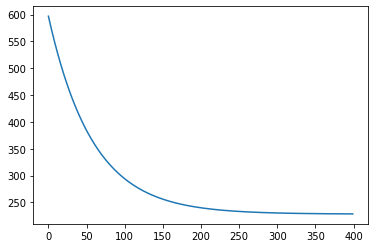

In [13]:
#Lets see how the cost changes with number of iters
x_axis = np.arange(0,len(cost_vals),1)
plt.plot(x_axis,cost_vals)
plt.show()

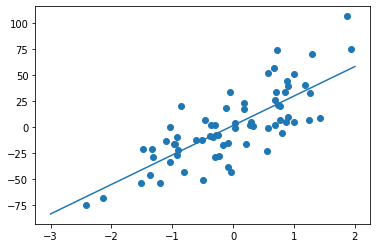

In [14]:
#Lets now plot the line to see how well it has fit the data
plt.figure()
plt.scatter(x,y)
linex = np.arange(-3,3,1)
liney = a*linex + b
plt.plot(linex,liney)

In [15]:
#Lets see what values it has learnt 
print("a = ",a)
print("b = ",b)

a =  28.331297201934877
b =  1.8689084353409613
